# 探索 NBA 数据

我们首先安装 `Goldsberry` 包，项目源地址：

https://github.com/bradleyfay/py-Goldsberry

使用 `pip` 安装：

    pip install py-goldsberry

该包的接口与 `pandas` 兼容，可以与 `pandas` 的 `DataFrame` 一起使用。

In [1]:
import goldsberry as gb
import pandas as pd

当前使用的版本号为：

In [2]:
gb.__version__

'0.8.0.1'

## 球员信息

获得 `2015-2016` 赛季运动员的名单：

In [3]:
players = gb.PlayerList().players()
players = pd.DataFrame(players)

players.head()

,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
0,"Acy, Quincy",2012,Y,203112,quincy_acy,1,SAC,Sacramento,kings,1610612758,Kings,2015
1,"Adams, Jordan",2014,Y,203919,jordan_adams,1,MEM,Memphis,grizzlies,1610612763,Grizzlies,2015
2,"Adams, Steven",2013,Y,203500,steven_adams,1,OKC,Oklahoma City,thunder,1610612760,Thunder,2015
3,"Afflalo, Arron",2007,Y,201167,arron_afflalo,1,NYK,New York,knicks,1610612752,Knicks,2015
4,"Ajinca, Alexis",2008,Y,201582,alexis_ajinca,1,NOP,New Orleans,pelicans,1610612740,Pelicans,2015


球员总数为：

In [4]:
print len(players)

464


通过查询特定的 `TEAM_ABBREVIATION`，我们可以查看某个球队本赛季的球员，比如 `2014-2015` 赛季的总冠军金州勇士 `GSW`：

In [5]:
gsw_players = players.ix[players["TEAM_ABBREVIATION"] == "GSW"]

gsw_players[["DISPLAY_LAST_COMMA_FIRST", "FROM_YEAR", "TEAM_ABBREVIATION", "TEAM_CITY", "TEAM_NAME", "PERSON_ID"]]

,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,TEAM_ABBREVIATION,TEAM_CITY,TEAM_NAME,PERSON_ID
30,"Barbosa, Leandro",2003,GSW,Golden State,Warriors,2571
33,"Barnes, Harrison",2012,GSW,Golden State,Warriors,203084
52,"Bogut, Andrew",2005,GSW,Golden State,Warriors,101106
86,"Clark, Ian",2013,GSW,Golden State,Warriors,203546
103,"Curry, Stephen",2009,GSW,Golden State,Warriors,201939
135,"Ezeli, Festus",2012,GSW,Golden State,Warriors,203105
164,"Green, Draymond",2012,GSW,Golden State,Warriors,203110
209,"Iguodala, Andre",2004,GSW,Golden State,Warriors,2738
262,"Livingston, Shaun",2004,GSW,Golden State,Warriors,2733
263,"Looney, Kevon",2015,GSW,Golden State,Warriors,1626172


## 球员比赛数据

通过 `DISPLAY_LAST_COMMA_FIRST`，我们来查询宣布本赛季之后退役的科比布莱恩特（`Kobe, Bryant`）的信息：

In [6]:
kobe = players.ix[players["DISPLAY_LAST_COMMA_FIRST"].str.contains("Kobe")]

kobe

,DISPLAY_LAST_COMMA_FIRST,FROM_YEAR,GAMES_PLAYED_FLAG,PERSON_ID,PLAYERCODE,ROSTERSTATUS,TEAM_ABBREVIATION,TEAM_CITY,TEAM_CODE,TEAM_ID,TEAM_NAME,TO_YEAR
64,"Bryant, Kobe",1996,Y,977,kobe_bryant,1,LAL,Los Angeles,lakers,1610612747,Lakers,2015


为了方便，我们将 `Kobe` 的 `ID` 放到变量中去：

In [7]:
kobe_id = 977

我们来看本赛季 `Kobe` 的比赛记录：

In [8]:
kobe_logs = gb.player.game_logs(kobe_id)

kobe_logs = pd.DataFrame(kobe_logs.logs())

# 最近五场比赛
kobe_logs.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,PF,PLUS_MINUS,PTS,Player_ID,REB,SEASON_ID,STL,TOV,VIDEO_AVAILABLE,WL
0,3,0,6,7,3,0.429,16,5,0.313,4,...,2,-19,17,977,6,22015,1,3,1,L
1,0,0,4,14,4,0.286,25,6,0.240,4,...,0,-6,19,977,5,22015,0,0,1,L
2,4,1,1,14,4,0.286,28,9,0.321,3,...,4,-2,25,977,2,22015,0,2,1,L
3,2,0,9,11,4,0.364,24,10,0.417,4,...,0,16,27,977,12,22015,2,1,1,W
4,5,0,3,11,7,0.636,21,10,0.476,12,...,3,6,38,977,5,22015,2,2,1,W


截至到全明星赛前，本赛季 `Kobe` 一共参加了 44 场比赛，其场均数据为：

In [9]:
kobe_logs.Game_ID

0     0021500795
1     0021500776
2     0021500767
3     0021500747
4     0021500734
5     0021500720
6     0021500697
7     0021500662
8     0021500653
9     0021500638
10    0021500614
11    0021500608
12    0021500592
13    0021500576
14    0021500549
15    0021500539
16    0021500476
17    0021500458
18    0021500455
19    0021500440
20    0021500435
21    0021500422
22    0021500385
23    0021500370
24    0021500349
25    0021500342
26    0021500325
27    0021500308
28    0021500301
29    0021500286
30    0021500269
31    0021500263
32    0021500253
33    0021500244
34    0021500214
35    0021500201
36    0021500188
37    0021500151
38    0021500135
39    0021500095
40    0021500077
41    0021500059
42    0021500045
43    0021500031
44    0021500017
Name: Game_ID, dtype: object

In [10]:
def show_avg_info(avg):
    print "得分：{:.1f}".format(avg.ix["PTS"])
    print "篮板：{:.1f}".format(avg.ix["REB"])
    print "助攻：{:.1f}".format(avg.ix["AST"])
    print "盖帽：{:.1f}".format(avg.ix["BLK"])
    print "时间：{:.1f}".format(avg.ix["MIN"])
    print "抢断：{:.1f}".format(avg.ix["STL"])
    print "失误：{:.1f}".format(avg.ix["TOV"])
    print "犯规：{:.1f}".format(avg.ix["PF"])
    print "投篮：{:.1f}%".format(avg.ix["FGM"] * 100 / avg.ix["FGA"])
    print "三分：{:.1f}%".format(avg.ix["FG3M"] * 100 / avg.ix["FG3A"])
    print "罚篮：{:.1f}%".format(avg.ix["FTM"] * 100 / avg.ix["FTA"])
    print "后篮板：{:.1f}".format(avg.ix["DREB"])
    print "前篮板：{:.1f}".format(avg.ix["OREB"])
    print "正负值：{:.1f}".format(avg.ix["PLUS_MINUS"])
    
show_avg_info(kobe_logs.mean())

得分：16.9
篮板：4.2
助攻：3.4
盖帽：0.2
时间：29.3
抢断：1.0
失误：2.2
犯规：1.9
投篮：34.9%
三分：28.0%
罚篮：80.3%
后篮板：3.5
前篮板：0.7
正负值：-7.9


再看一下史提芬库里的场均数据（不要问我为什么跪着看球）：

In [3]:
curry_id = 201939
curry_logs = gb.player.game_logs(curry_id)
curry_logs = pd.DataFrame(curry_logs.logs())

show_avg_info(curry_logs.mean())

NameError: name 'gb' is not defined

当然我们也可以对比一下职业生涯的数据：

In [12]:
kobe_career = gb.player.career_stats(kobe_id)
curry_career = gb.player.career_stats(curry_id)

职业生涯最高：

In [13]:
def show_career_high(career):
    career_high = pd.DataFrame(career.career_high()).ix[[0,1,5]]
    print career_high[["GAME_DATE", "STAT", "STAT_VALUE", "VS_TEAM_CITY", "VS_TEAM_NAME"]]

print "Kobe"
show_career_high(kobe_career)

print "Curry"
show_career_high(curry_career)

Kobe
     GAME_DATE STAT  STAT_VALUE VS_TEAM_CITY VS_TEAM_NAME
0  JAN 22 2006  PTS          81      Toronto      Raptors
1  JAN 24 2010  REB          16      Toronto      Raptors
5  JAN 15 2015  AST          17    Cleveland    Cavaliers
Curry
     GAME_DATE STAT  STAT_VALUE VS_TEAM_CITY VS_TEAM_NAME
0  FEB 27 2013  PTS          54     New York       Knicks
1  DEC 28 2015  REB          14   Sacramento        Kings
5  DEC 27 2013  AST          16      Phoenix         Suns


本赛季最高：

In [14]:
def show_season_high(career):
    career_high = pd.DataFrame(career.season_high()).ix[[0,1,5]]
    print career_high[["GAME_DATE", "STAT", "STAT_VALUE", "VS_TEAM_CITY", "VS_TEAM_NAME"]]

print "Kobe"
show_season_high(kobe_career)

print "Curry"
show_season_high(curry_career)

Kobe
     GAME_DATE STAT  STAT_VALUE VS_TEAM_CITY  VS_TEAM_NAME
0  FEB 02 2016  PTS          38    Minnesota  Timberwolves
1  FEB 04 2016  REB          12  New Orleans      Pelicans
5  NOV 15 2015  AST           9      Detroit       Pistons
Curry
     GAME_DATE STAT  STAT_VALUE VS_TEAM_CITY VS_TEAM_NAME
0  OCT 31 2015  PTS          53  New Orleans     Pelicans
1  DEC 28 2015  REB          14   Sacramento        Kings
5  JAN 25 2016  STL           5  San Antonio        Spurs


## 比赛信息

In [15]:
game_ids = gb.GameIDs()
game_ids = pd.DataFrame(game_ids.game_list())

game_ids.head()

,AST,BLK,DREB,FG3A,FG3M,FG3_PCT,FGA,FGM,FG_PCT,FTA,...,PTS,REB,SEASON_ID,STL,TEAM_ABBREVIATION,TEAM_ID,TEAM_NAME,TOV,VIDEO_AVAILABLE,WL
0,28,4,45,29,8,0.276,124,56,0.452,46,...,147,64,22015,7,DET,1610612765,Detroit Pistons,11,1,W
1,30,2,36,23,9,0.391,87,53,0.609,34,...,142,46,22015,9,SAC,1610612758,Sacramento Kings,15,1,W
2,34,2,30,21,9,0.429,86,52,0.605,13,...,123,38,22015,10,SAS,1610612759,San Antonio Spurs,13,1,W
3,29,6,36,35,16,0.457,95,52,0.547,15,...,131,46,22015,10,GSW,1610612744,Golden State Warriors,15,1,W
4,34,8,38,31,8,0.258,104,52,0.500,16,...,122,46,22015,10,SAC,1610612758,Sacramento Kings,20,1,L


## 获得运动员的头像

In [1]:
from IPython.display import Image

Image("http://stats.nba.com/media/players/230x185/"+str(kobe_id)+".png")

NameError: name 'kobe_id' is not defined

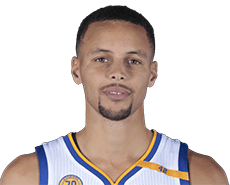

In [4]:
Image("http://stats.nba.com/media/players/230x185/"+str(curry_id)+".png")

## More

修改了 `goldsberry\player\_Player.py` 代码中的错误，使之能够查询退役球员的信息，修改后的代码在本文件夹下，放到安装目录之后下面的代码均可以运行：

In [18]:
from goldsberry.player import _Player as pl_old

1997 年的球员列表：

In [19]:
players_1997 = pl_old.PlayerList(1997)

players_1997 = pd.DataFrame(players_1997)

乔丹的球员 ID：

In [20]:
jordan_id = players_1997["PERSON_ID"].ix[players_1997["DISPLAY_LAST_COMMA_FIRST"].str.contains("Jordan, Michael")]
jordan_id = jordan_id[jordan_id.index[0]]
jordan_id

893

乔丹在 1997-1998 赛季常规赛表现：

In [21]:
jordan_logs_1997 = pl_old.game_logs(jordan_id, season="1997")
jordan_logs_1997 = pd.DataFrame(jordan_logs_1997.logs())

show_avg_info(jordan_logs_1997.mean())

得分：28.7
篮板：5.8
助攻：3.5
盖帽：0.5
时间：38.9
抢断：1.7
失误：2.3
犯规：1.8
投篮：46.5%
三分：23.8%
罚篮：78.4%
后篮板：4.2
前篮板：1.6
正负值：7.3


乔丹在 1997-1998 赛季季后赛表现：

In [22]:
jordan_logs_1997 = pl_old.game_logs(jordan_id, season="1997", seasontype=2)
jordan_logs_1997 = pd.DataFrame(jordan_logs_1997.logs())

show_avg_info(jordan_logs_1997.mean())

得分：32.4
篮板：5.1
助攻：3.5
盖帽：0.6
时间：41.0
抢断：1.5
失误：2.1
犯规：2.2
投篮：46.2%
三分：30.2%
罚篮：81.2%
后篮板：3.5
前篮板：1.6
正负值：7.5


头像：

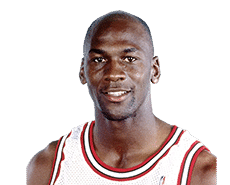

In [23]:
Image("http://stats.nba.com/media/players/230x185/"+str(jordan_id)+".png")